In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.dropna(inplace = True,axis = 0)

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

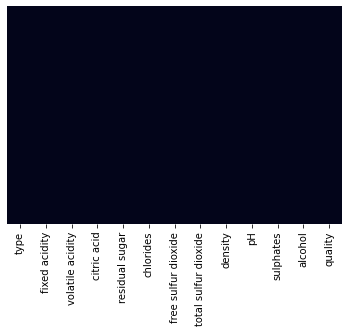

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

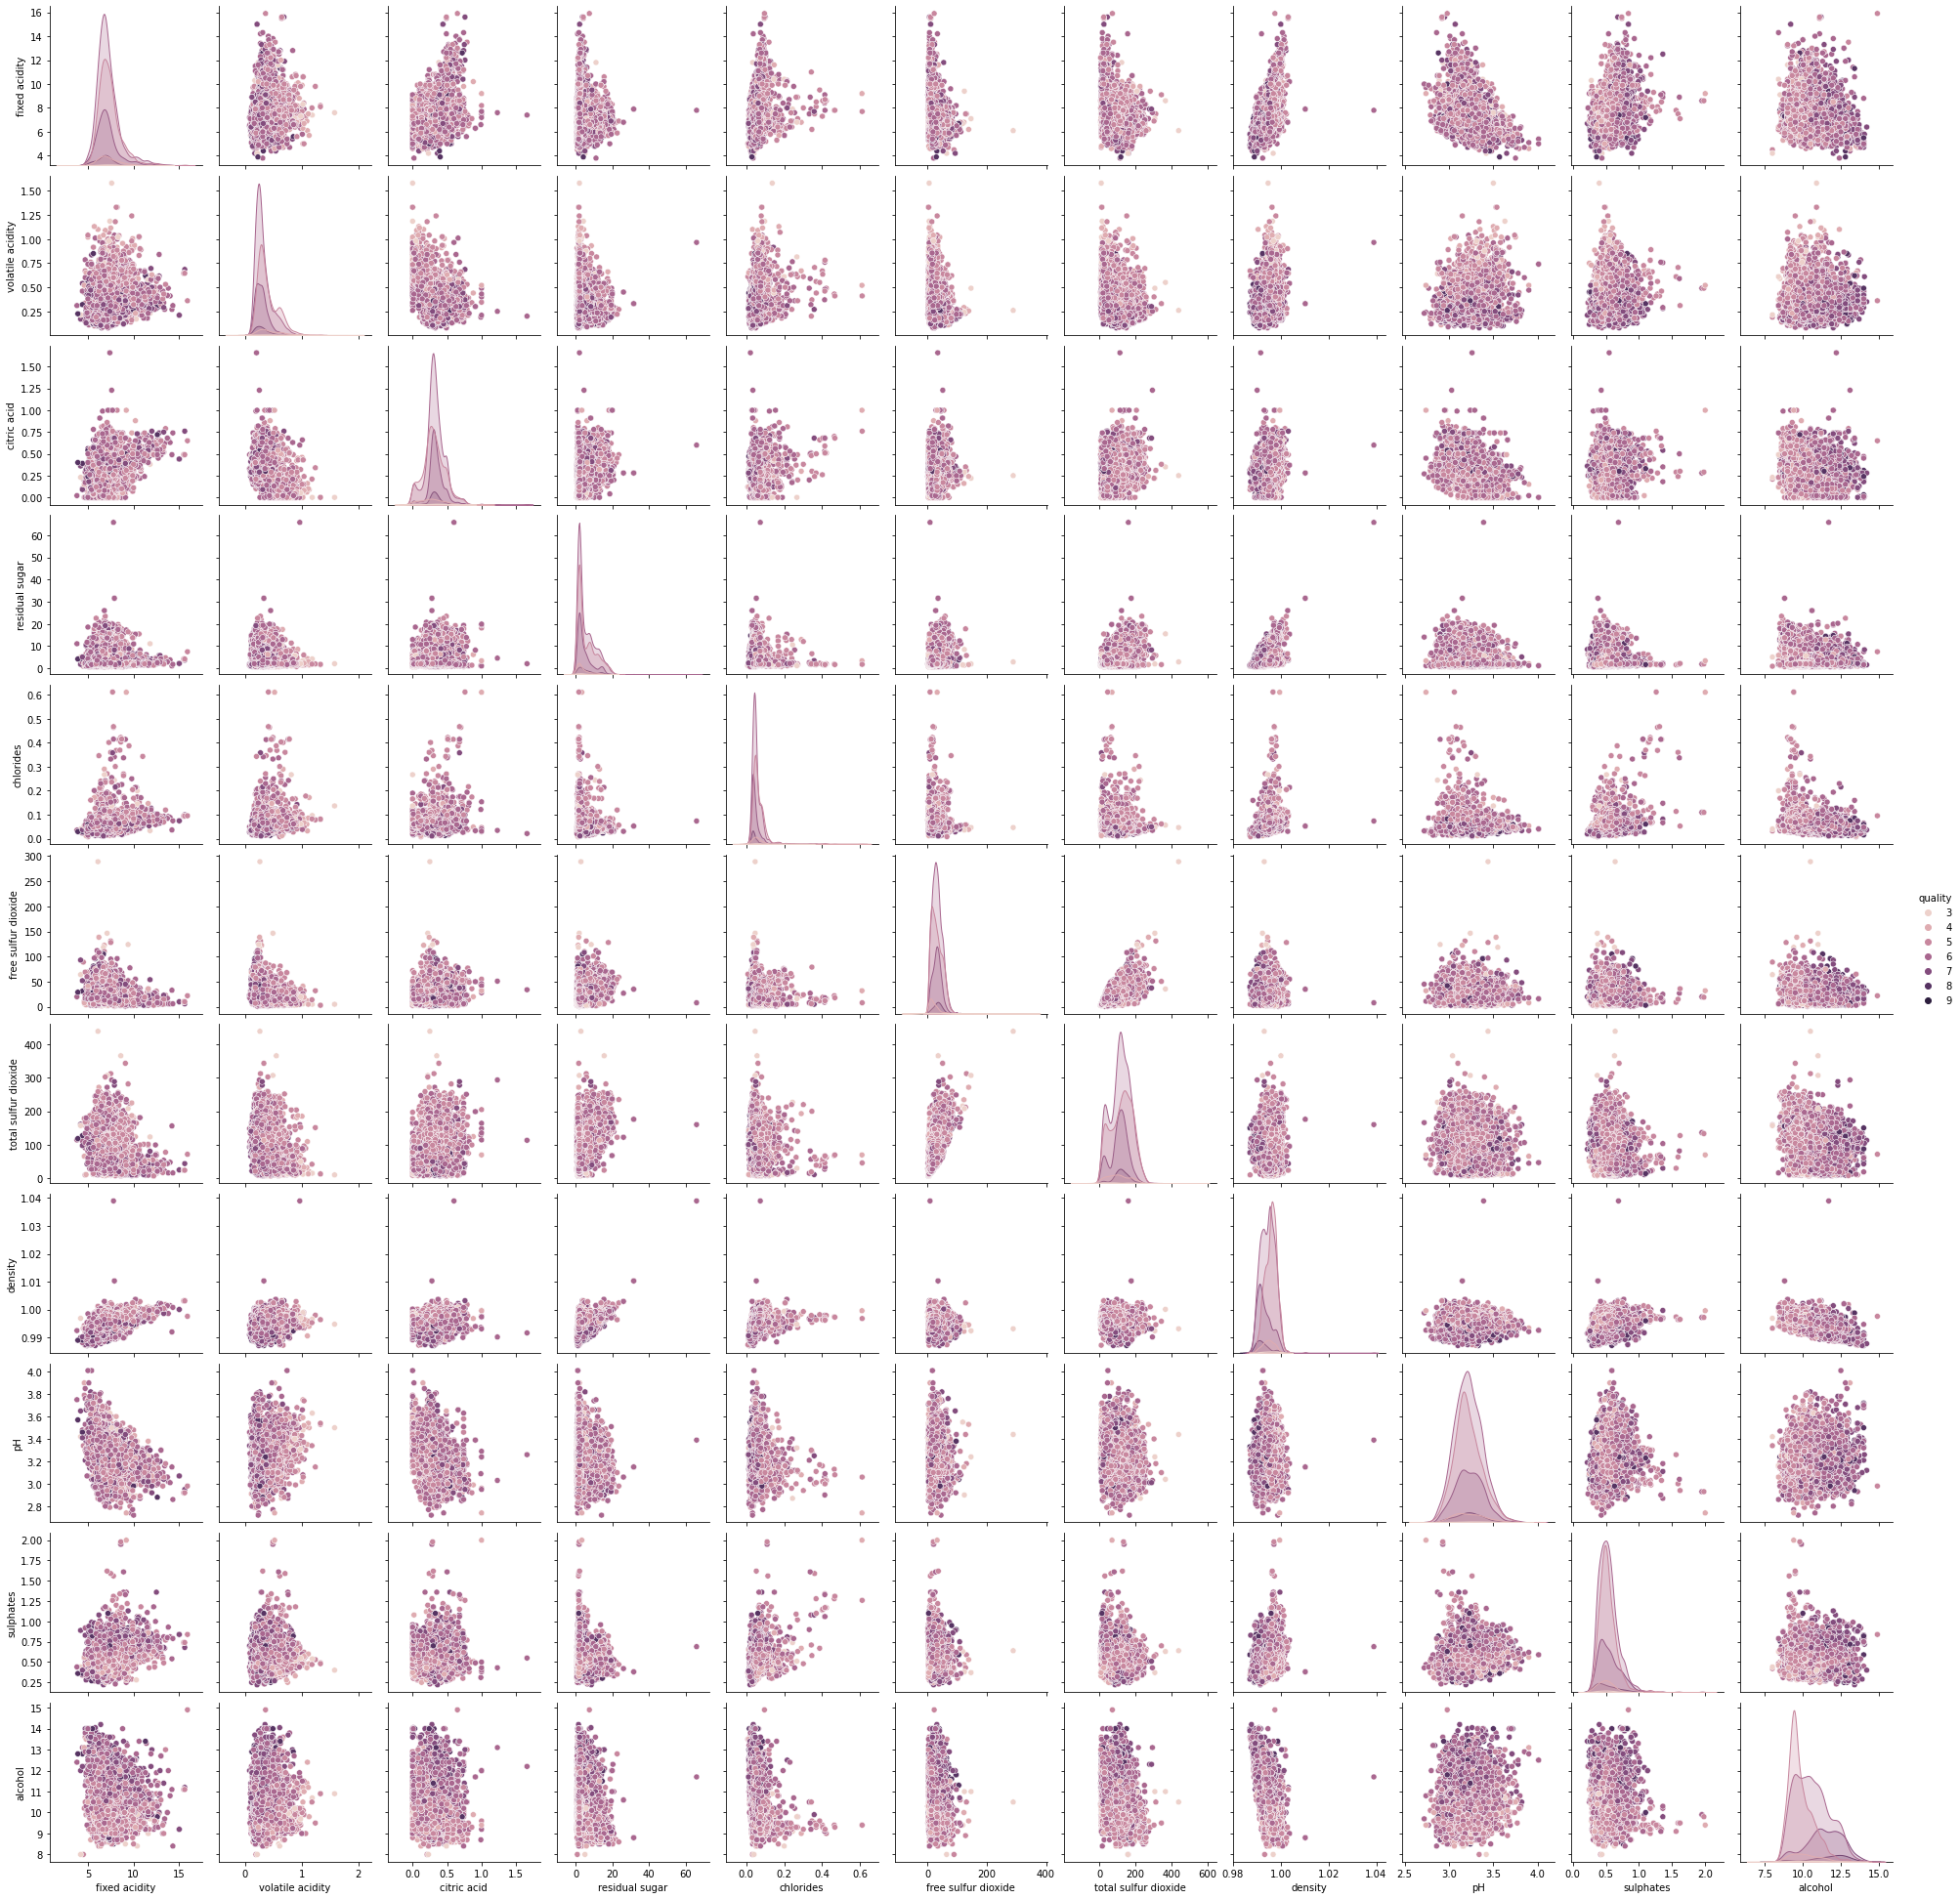

In [21]:
sns.pairplot(df, hue="quality")

Text(0, 0.5, 'correlation')

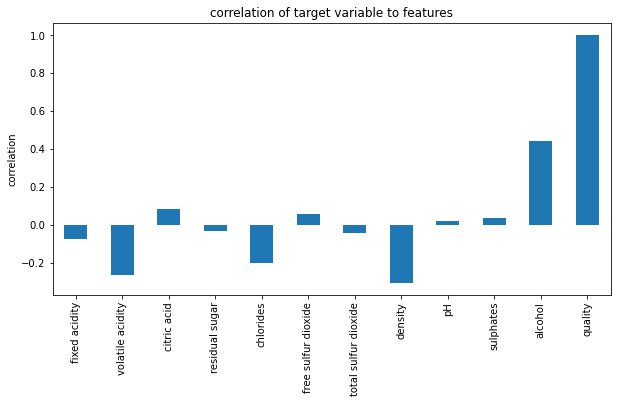

In [9]:
plt.figure(figsize=(10,5))
ax = df.corr()['quality'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [24]:
ps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,type,type,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,type,fixed acidity,0.077007,regression,True,mean absolute error,0.894090,0.825239,DecisionTreeRegressor()
2,type,volatile acidity,0.230633,regression,True,mean absolute error,0.116915,0.089951,DecisionTreeRegressor()
3,type,citric acid,0.000000,regression,True,mean absolute error,0.105444,0.105758,DecisionTreeRegressor()
4,type,residual sugar,0.057370,regression,True,mean absolute error,3.602150,3.395494,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,quality,density,0.074006,regression,True,mean absolute error,0.002484,0.002300,DecisionTreeRegressor()
165,quality,pH,0.000000,regression,True,mean absolute error,0.127268,0.127788,DecisionTreeRegressor()
166,quality,sulphates,0.000000,regression,True,mean absolute error,0.108144,0.109686,DecisionTreeRegressor()
167,quality,alcohol,0.143341,regression,True,mean absolute error,0.988184,0.846537,DecisionTreeRegressor()


<AxesSubplot:title={'center':'Predictive Power Score plot'}, xlabel='x', ylabel='y'>

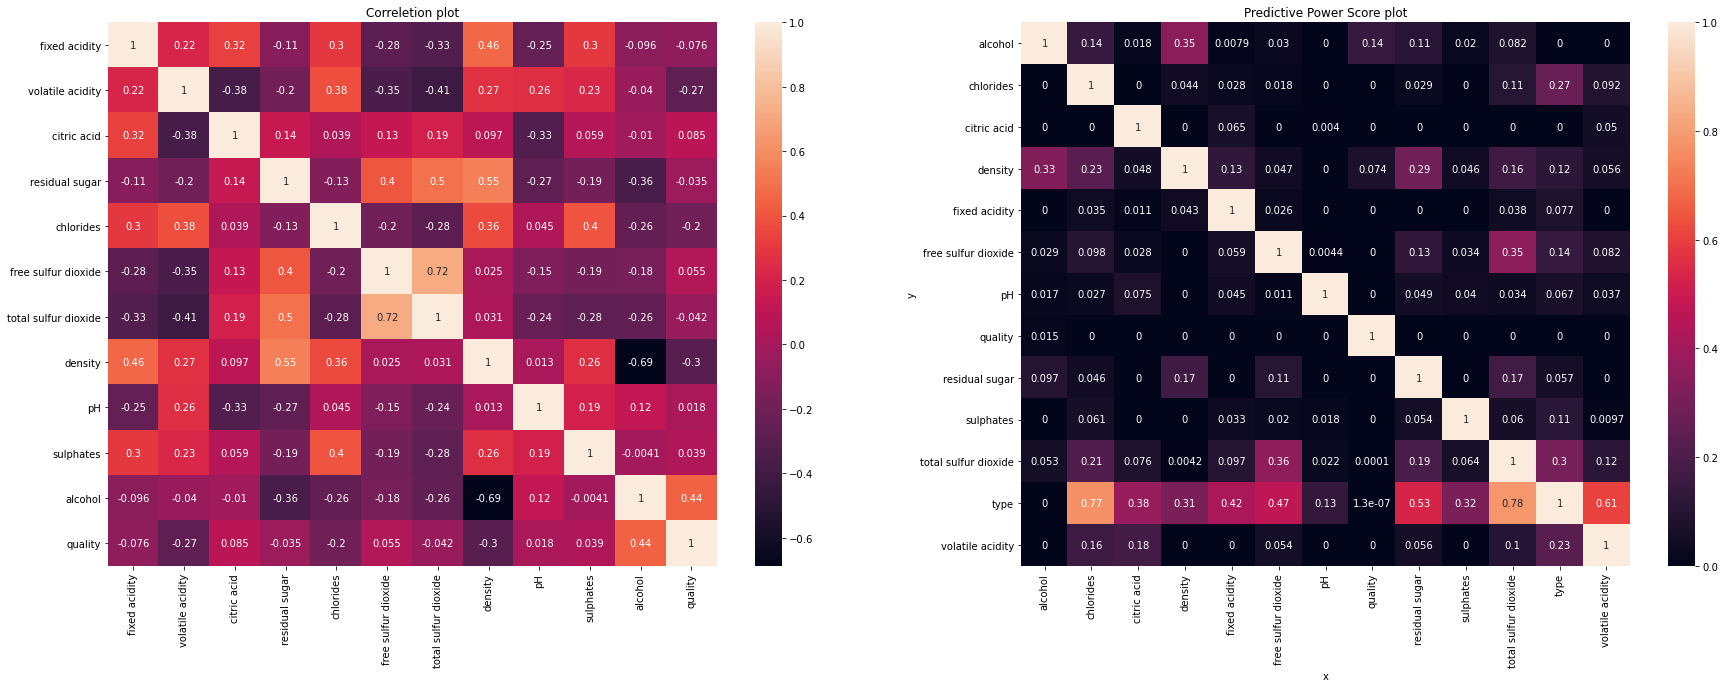

In [11]:
plt.figure(figsize=(30,10))

plt.subplot(121,title = 'Correletion plot')
sns.heatmap(df.corr(),annot=True);

matrix_df = ps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.subplot(122,title='Predictive Power Score plot')
sns.heatmap(matrix_df,annot=True)

In [12]:
df['type'] = df['type'].map({'white':0, 'red':1})


In [13]:

df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Text(0.5, 1.0, 'Wine quality')

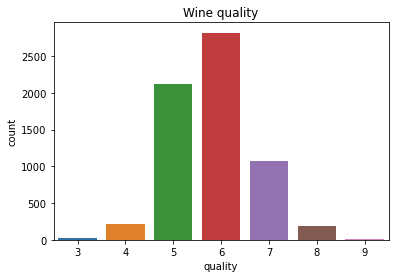

In [31]:
sns.countplot(data=df, x="quality").set_title("Wine quality")

In [14]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop(columns=['quality'],axis=1) 
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [16]:
df_bins3= df.copy()

In [17]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

print(df_bins3[['quality_range','quality']].head(5))

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Text(0.5, 1.0, 'Wine quality')

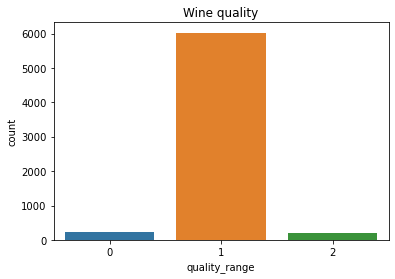

In [37]:
sns.countplot(data=df_bins3, x="quality_range").set_title("Wine quality")

In [18]:
df_bins3 = df_bins3.drop(columns=['quality'],axis=1).copy()

In [19]:
X = df_bins3.drop(columns=['quality_range'],axis=1) 
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [20]:
X.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [22]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


In [23]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [24]:
AutoML.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.9458413926499032

Generation 2 - Current best internal CV score: 0.9458413926499032

Generation 3 - Current best internal CV score: 0.9458413926499032

Generation 4 - Current best internal CV score: 0.9458413926499032

Generation 5 - Current best internal CV score: 0.94642166344294

Best pipeline: KNeighborsClassifier(StandardScaler(input_matrix), n_neighbors=16, p=1, weights=distance)


TPOTClassifier(generations=5, verbosity=2)

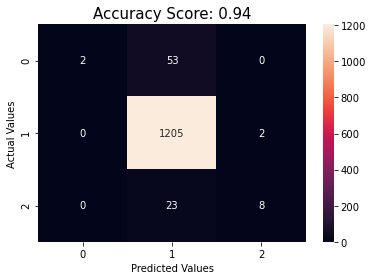

In [25]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [26]:
AutoML.export('pipeline.py')